# One-compartment Pharmacokinetic Model

In [13]:
import os

import chi
import chi.library
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import myokit
import numpy as np
import pints
import seaborn as sns
sns.set_theme()

## Define model

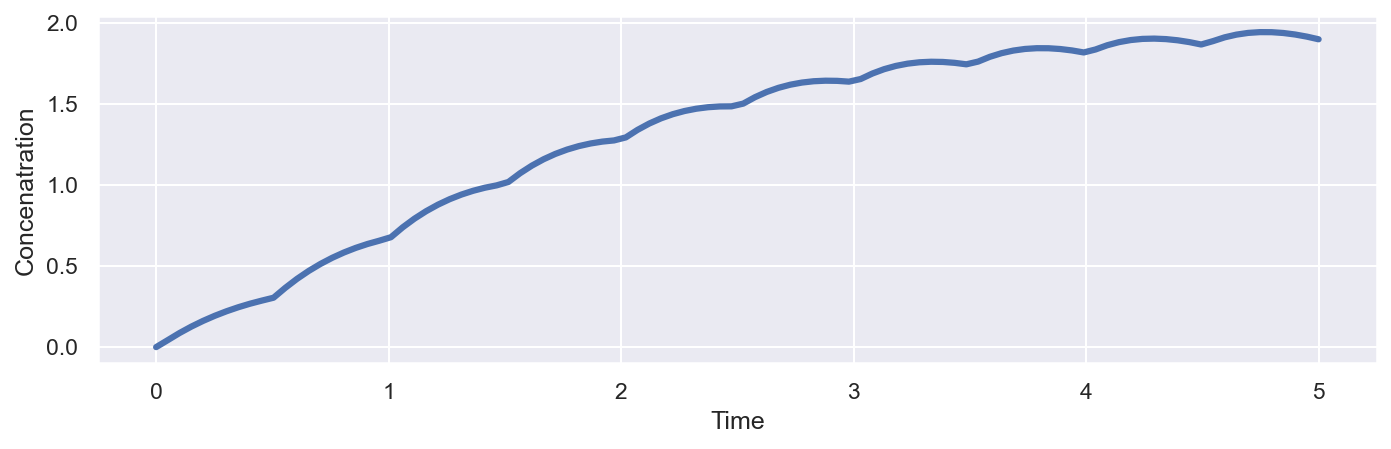

In [12]:
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=False)

# Solve model for toy dosing regimen
parameters = [
    0,  # central.drug_amount
    0,  # dose.drug_amount
    1,  # central.size
    1,  # dose.absorption_rate
    1   # myokit.elimination_rate
]
times = np.linspace(0, 5, 100)
model.set_dosing_regimen(dose=1, period=0.5)
sim = model.simulate(times=times, parameters=parameters)[0]

# Plot results
fontsize = 11
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 700 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 1)

# Create axes
axes = []
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

ax.plot(times, sim, linewidth=3)
ax.set_xlabel('Time')
ax.set_ylabel('Concenatration')

plt.show()

## Dosing regimen optimisation

Let's find the dosing regimen that targets a concentration of 1.

In the typical inverse problem workflow, we infer parameters from measurements.
The uncertainty about the inferred parameters stems from the inherent
stochasticity in the measurement process.

In this iteration of Bayesian dosing regimen optimisiation, there is no
uncertainty about the model parameters -- the distribution of dosing regimens
indicates the equivalence of dosing regimens to target the desired treatment
response. The "residual error" distribution that is otherwise used to quantify
measurement noise and model misspecifications, is now used to quantify the
leneancy of the optimisation, i.e. how far is the model output allowed to
deviate from the target.

Here, we use a Gaussian distribution for simplicity.

In [ ]:
class DRMechanisticModel(chi.PKPDModel):
    def __init__(self, model):
        super(DRMechanisticModel, self).__init__(self)
        if not isinstance(model, chi.MechanisticModel):
            raise TypeError("Wrong model input.")

        self = model

    def simulate(self, parameters, times):

        return
